In [2]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Check for missing values
print("Missing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# EDA on Customers.csv
print("\nCustomers Overview:")
print(customers.info())
print(customers.describe(include='all'))


Customers Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [6]:
# EDA on Products.csv
print("\nProducts Overview:")
print(products.info())
print(products.describe())


Products Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [7]:
# EDA on Transactions.csv
print("\nTransactions Overview:")
print(transactions.info())
print(transactions.describe())


Transactions Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497

In [8]:
# Merge datasets for holistic insights
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


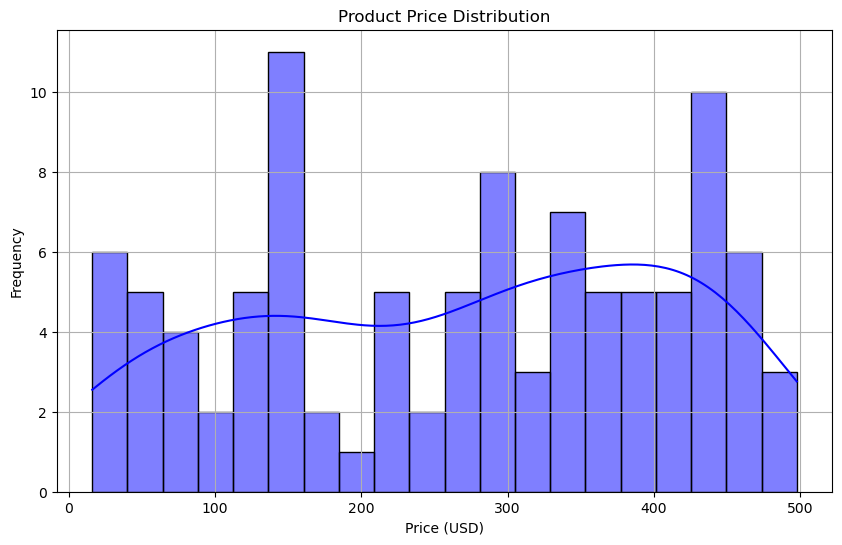

In [9]:
# Visualizations

# 1. Price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], bins=20, kde=True, color='blue')
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

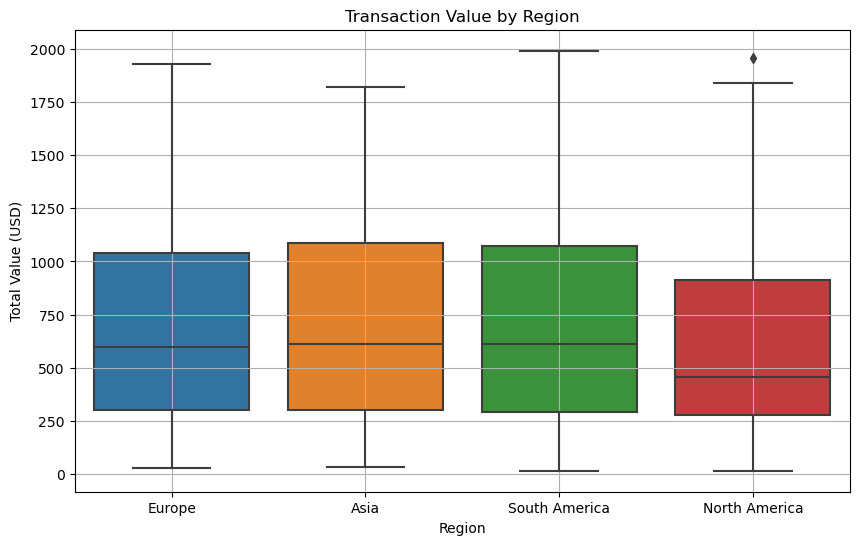

In [10]:
# 2. Transaction value analysis by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_data)
plt.title("Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Total Value (USD)")
plt.grid()
plt.show()

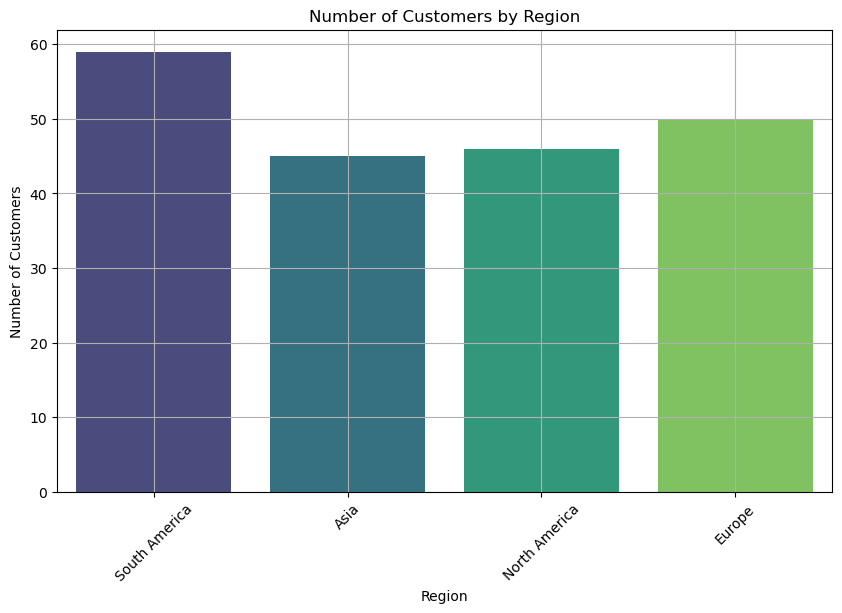

In [11]:
# 3. Number of Customers by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid()
plt.show()

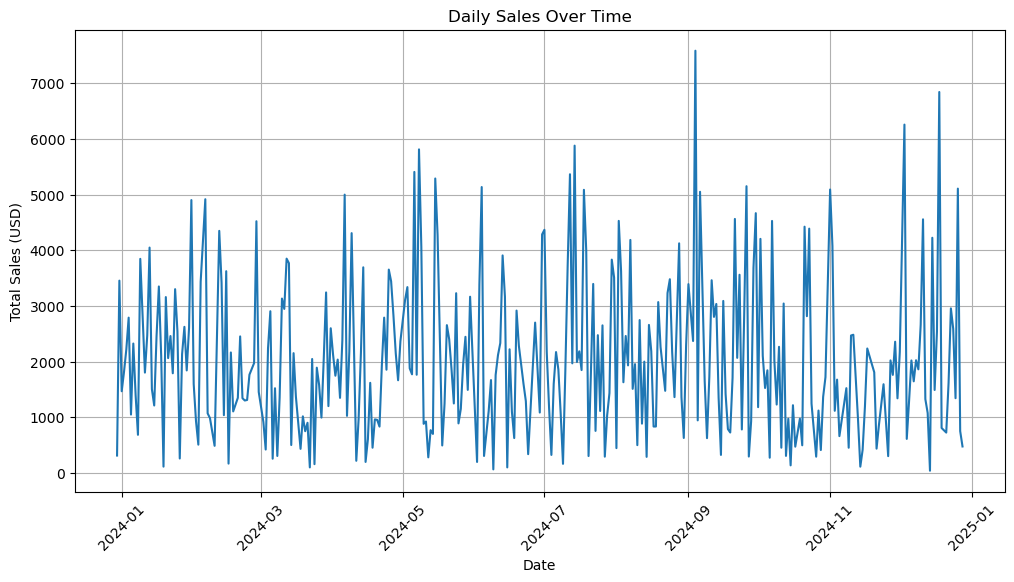

In [12]:
# 4. Daily Sales Over Time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
daily_sales = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

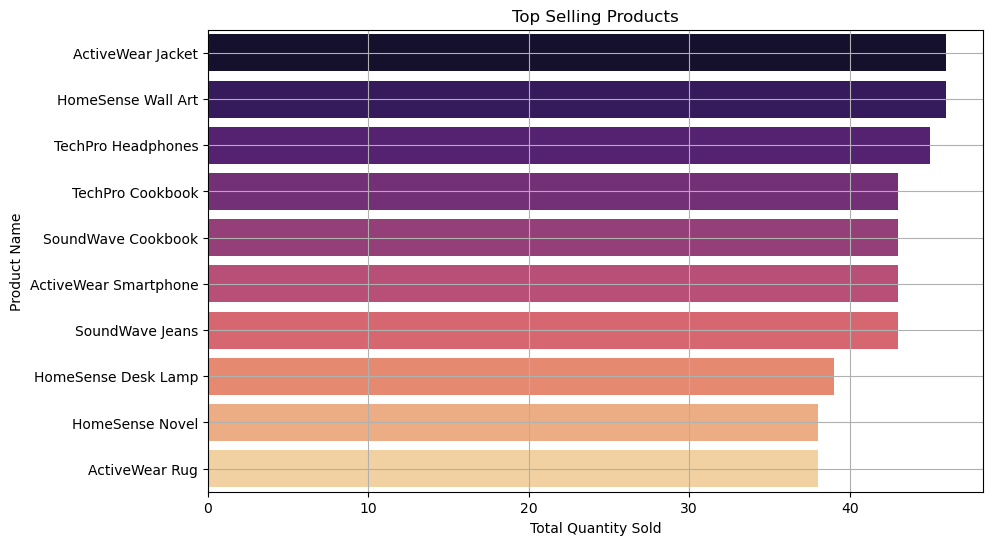

In [13]:
# 5. Top Selling Products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10)
top_product_names = products[products['ProductID'].isin(top_products.index)]['ProductName']
top_products_df = pd.DataFrame({'ProductName': top_product_names, 'TotalQuantity': top_products.values})

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_df, x='TotalQuantity', y='ProductName', palette='magma')
plt.title('Top Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.grid()
plt.show()

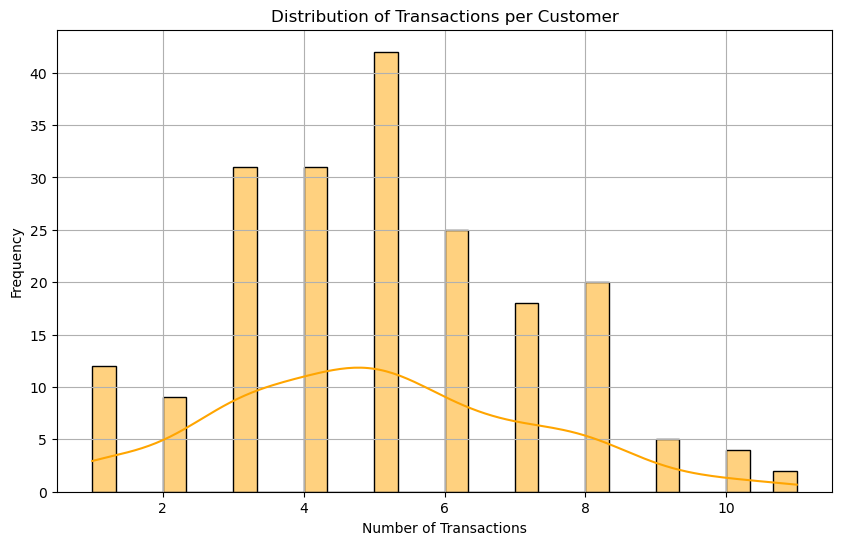

In [14]:
# 6. Distribution of Transactions per Customer
customer_transactions = transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=30, kde=True, color='orange')
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [18]:
# 7. Interactive Visualization of Daily Sales
fig = px.line(daily_sales.reset_index(), x='TransactionDate', y='TotalValue', title='Interactive Daily Sales Over Time')
fig.update_layout(xaxis_title='Date', yaxis_title='Total Sales (USD)')
fig.show()